# Guide to estimate SED errors

In [5]:
from astropy import units as u
import numpy as np
import sed_analysis_tools as st
import warnings
warnings.filterwarnings("ignore")

## Recommended approch
- Create a `Binary`object with the filter wavelengths, fractional errors and SED based stellar parameters (T_A_, L_A, T_B_, L_B)
- Use the `estimate_errors` to get lower limits to the fitting errors based on blackbody assumptions
- Use `evaluate_pseudo_secondaries` to understand if there is any degeneracy in the secondary recovery space

B
-----
T_in  = [300000.000000]
L_in  = [1.000000]
T_fit = [158972.897116 +214488.545372-80722.128686]
L_fit = [0.134766 +1.836627-0.114097]
Convergence rate:0.69
logT                        5.477121
logL                        0.000000
T                      300000.000000
L                           1.000000
logT_Single_16              4.893402
logT_Single_50              5.201323
logT_Single_84              5.572227
e_logT_Single_upper         0.370904
e_logT_Single_lower         0.307922
logL_Single_16             -1.687507
logL_Single_50             -0.870419
logL_Single_84              0.294700
e_logL_Single_upper         1.165119
e_logL_Single_lower         0.817089
T_Single_16             78250.768429
T_Single_50            158972.897116
T_Single_84            373461.442487
e_T_Single_upper       214488.545372
e_T_Single_lower        80722.128686
L_Single_16                 0.020669
L_Single_50                 0.134766
L_Single_84                 1.971393
e_L_Single_upper       

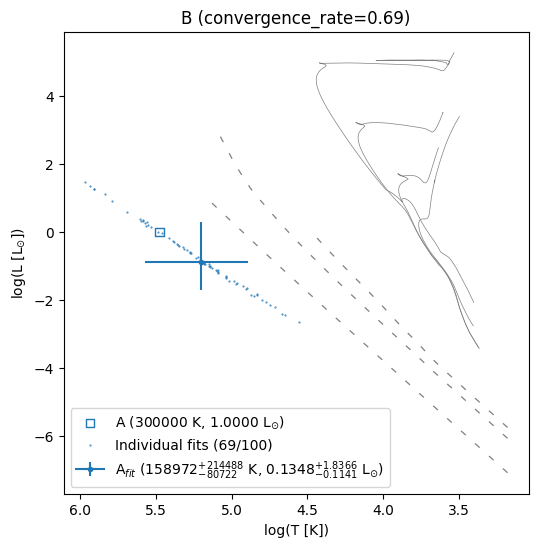

In [8]:
filter_set = st.FilterSet(list_pivot_wavelengths=np.logspace(3.2, 4.7, 16) * u.Angstrom)
starB = st.Star(T=300000*u.K, 
                L=1*u.solLum, 
                frac_err=0.3,
                seed=0,
                D=10*u.pc,
                threshold_ewr=5.0,
                filter_set=filter_set,
                name='B')
starB.estimate_errors(niter=100,
                      verbose=True)
starB.plot_estimated_errors()
print(starB.df_error_summary)

WOCS2002
--------
T_in  = [5250.000000]	 [14750.000000]
L_in  = [18.000000]	 [0.093000]
T_fit = [5247.735616 +28.367891-30.143021]	[14766.376248 +2650.823336-1819.997442]
L_fit = [17.953317 +0.180461-0.207411]	[0.092202 +0.042894-0.025599]
Convergence rate:1.00


WOCS2002: Grid params :   0%|          | 0/100 [00:00<?, ?it/s]

logT_A                       3.720159
logL_A                       1.255273
logT_B                       4.168792
logL_B                      -1.031517
T_A                       5250.000000
L_A                         18.000000
T_B                      14750.000000
L_B                          0.093000
logT_A_Double_16             3.717470
logT_A_Double_50             3.719972
logT_A_Double_84             3.722313
e_logT_A_Double_upper        0.002341
e_logT_A_Double_lower        0.002502
logL_A_Double_16             1.249098
logL_A_Double_50             1.254145
logL_A_Double_84             1.258488
e_logL_A_Double_upper        0.004344
e_logL_A_Double_lower        0.005047
logT_B_Double_16             4.112148
logT_B_Double_50             4.169273
logT_B_Double_84             4.240975
e_logT_B_Double_upper        0.071702
e_logT_B_Double_lower        0.057126
logL_B_Double_16            -1.176510
logL_B_Double_50            -1.035262
logL_B_Double_84            -0.869362
e_logL_B_Dou

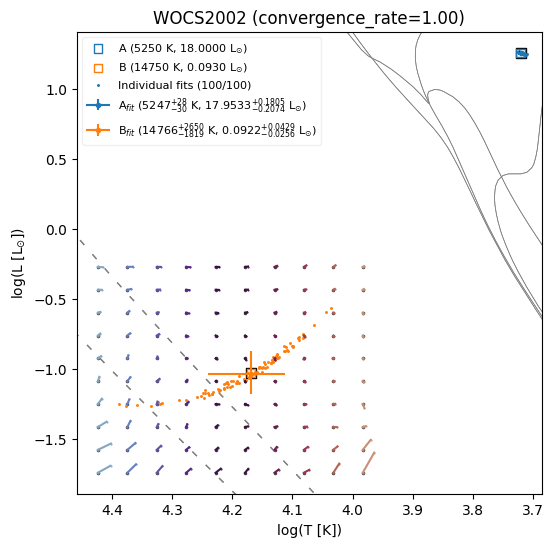

In [9]:


"""
Stellar parameters and flux error values are taken from the WOCS2002 star in M67. - Jadhav et al. (2019)
"""

frac_err = [
    0.05341997,
    0.05986721,
    0.05341997,
    0.02632069,
    0.06585393,
    0.00377348,
    0.06585393,
    0.00276771,
    0.00400373,
    0.06585393,
    0.00806181,
    0.02026275,
    0.01842068,
    0.01657861,
    0.01934171,
    0.01657861,
    0.03499929,
]
x = np.array(
    [
        3.17055506,
        3.18780264,
        3.20628604,
        3.36236302,
        3.63921512,
        3.70206419,
        3.72967016,
        3.7651012,
        3.88195269,
        3.90857131,
        3.93339412,
        4.09166696,
        4.22063102,
        4.33425264,
        4.52538174,
        4.6630221,
        5.06298789,
    ]
)
filter_set = st.FilterSet(list_pivot_wavelengths=10**x * u.Angstrom)
WOCS2002 = st.Binary(
    T_A=5250 * u.K,
    L_A=18 * u.solLum,
    T_B=14750 * u.K,
    L_B=0.0930 * u.solLum,
    frac_err=frac_err,
    seed=2,
    D=10 * u.pc,
    filter_set=filter_set,
    name="WOCS2002",
)
WOCS2002.estimate_errors(niter=100, verbose=True, threshold_primary_match=0.10)
WOCS2002.evaluate_pseudo_secondaries(grid_size=10, niter=100, refit=False)
WOCS2002.plot_error_and_pseudo_secondaries()
print(WOCS2002.df_error_summary)

## ADVANCED: Using filter transmission
- Uses the filter transmission to perform synthetic photometry
- ~1000 times slower than the infinitesimally narrow band approch with similar results (due to on-the-fly filter-spectrum convolution)

WOCS2002_with_filter_transmission
---------------------------------
T_in  = [5250.000000]	 [14750.000000]
L_in  = [18.000000]	 [0.093000]
T_fit = [5249.549374 +21.477557-47.459918]	[13826.073697 +8249.508217-1041.929859]
L_fit = [17.952060 +0.164233-0.209971]	[0.103876 +0.043730-0.047233]
Convergence rate:1.00


WOCS2002_with_filter_transmission: Grid params :   0%|          | 0/9 [00:00<?, ?it/s]

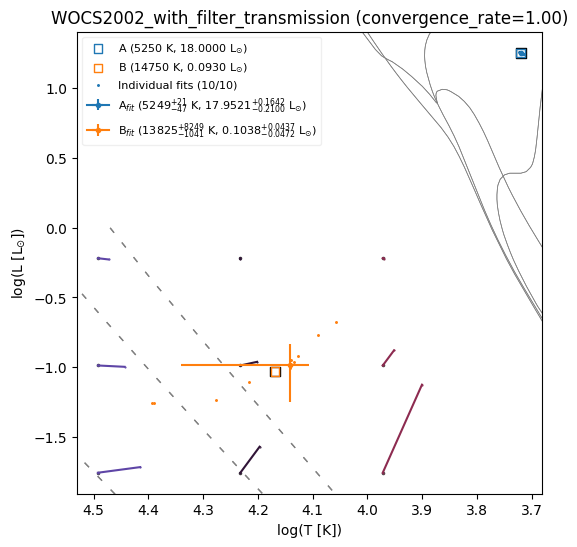

In [ ]:
import warnings

warnings.filterwarnings("ignore")

list_filter_names = [
    "Astrosat/UVIT.F148W",
    "Astrosat/UVIT.F154W",
    "Astrosat/UVIT.F169M",
    "GALEX/GALEX.NUV",
    "KPNO/Mosaic.B",
    "GAIA/GAIA3.Gbp",
    "KPNO/Mosaic.V",
    "GAIA/GAIA3.G",
    "GAIA/GAIA3.Grp",
    "KPNO/Mosaic.I",
    "GAIA/GAIA3.Grvs",
    "2MASS/2MASS.J",
    "2MASS/2MASS.H",
    "2MASS/2MASS.Ks",
    "WISE/WISE.W1",
    "WISE/WISE.W2",
    "WISE/WISE.W3",
]
filter_set_2 = st.FilterSet(list_filter_names=list_filter_names)
frac_err = [
    0.05341997,
    0.05986721,
    0.05341997,
    0.02632069,
    0.06585393,
    0.00377348,
    0.06585393,
    0.00276771,
    0.00400373,
    0.06585393,
    0.00806181,
    0.02026275,
    0.01842068,
    0.01657861,
    0.01934171,
    0.01657861,
    0.03499929,
]
WOCS2002 = st.Binary(
    T_A=5250 * u.K,
    L_A=18 * u.solLum,
    T_B=14750 * u.K,
    L_B=0.0930 * u.solLum,
    frac_err=frac_err,
    seed=2,
    D=10 * u.pc,
    filter_set=filter_set_2,
    name="WOCS2002_with_filter_transmission",
)
WOCS2002.estimate_errors(niter=10, verbose=True, threshold_primary_match=0.10)
WOCS2002.evaluate_pseudo_secondaries(grid_size=3, niter=10, refit=False)
WOCS2002.plot_error_and_pseudo_secondaries()
print(WOCS2002.df_error_summary)